In this notebook we will try to use profile to determine the edge of the sample

In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


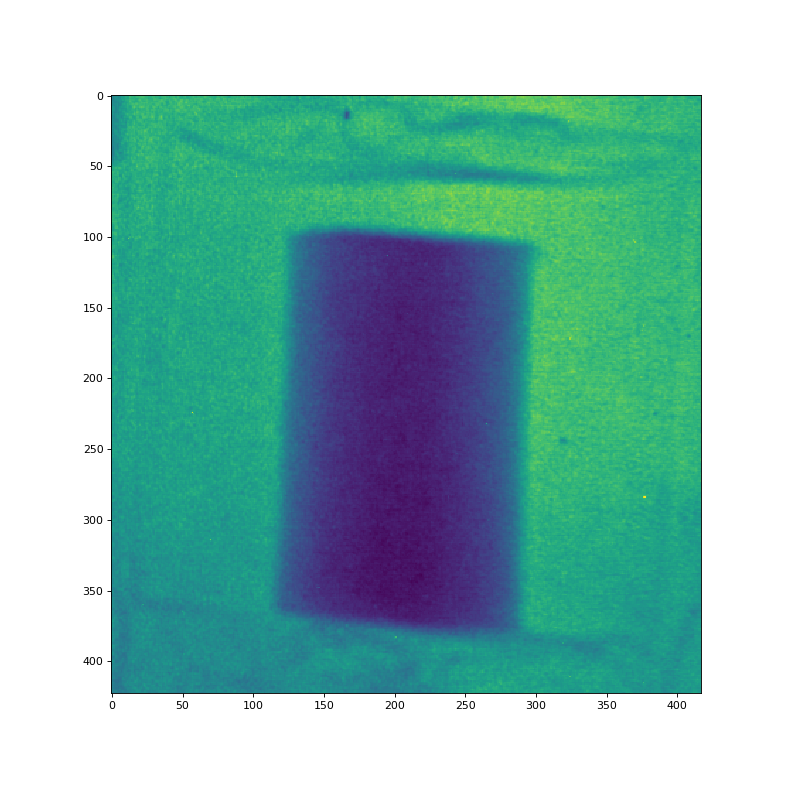

In [49]:
fig1 = plt.figure(figsize=(10,10))
ax_img2 = plt.subplot(111)
ax_img2.imshow(image_data[200], cmap='viridis')

In [1]:
import NeuNorm as neunorm
from NeuNorm.normalization import Normalization

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# %matplotlib inline

from ipywidgets.widgets import interact
from ipywidgets import widgets
from IPython.core.display import display, HTML

import copy

# histogram
from skimage import data, img_as_float

In [2]:
input_folder = "/Users/j35/IPTS/stickB_sample1/"
assert Path(input_folder).exists()

In [3]:
# load images

In [4]:
o_norm = Normalization()
o_norm.load(folder=input_folder, notebook=True)

In [5]:
image_data = copy.deepcopy(o_norm.data['sample']['data'])

In [6]:
# display stack and histogram

In [7]:
def plot_histogram(image_index):
    fig1 = plt.figure(figsize=(20, 10))

    ax_img1 = plt.subplot(121)
    ax_img1.hist(image_data[image_index].ravel(), histtype='step', bins=256)
    ax_img1.set_xlabel('Pixel Intensity')
    ax_img1.set_ylabel("Number of pixels")

    ax_img2 = plt.subplot(122)
    ax_img2.imshow(image_data[image_index], cmap='viridis')
    plt.show()
    
preview = interact(plot_histogram,
              image_index = widgets.IntSlider(min=0, 
                                            max=len(image_data)-1,
                                            step=1,
                                            value=0,
                                            description='Image Index',
                                            continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='Image Index', max=339), Output(…

## profile 

In [8]:
profile_width = 200

In [50]:
def plot_histogram(image_index):
    fig1 = plt.figure(figsize=(10, 10))

    horizontal_profile = image_data[image_index][:,profile_width]
    
    ax_img1 = plt.subplot(121)
    ax_img1.plot(horizontal_profile, '.')
    ax_img1.set_xlabel('Pixel')
    ax_img1.set_ylabel("Number of pixels")

    ax_img2 = plt.subplot(122)
    ax_img2.imshow(image_data[image_index], cmap='viridis')
    ax_img2.axvline(profile_width, color='w')
    plt.show()
    
preview = interact(plot_histogram,
              image_index = widgets.IntSlider(min=0, 
                                            max=len(image_data)-1,
                                            step=1,
                                            value=0,
                                            description='Image Index',
                                            continuous_update=False))





interactive(children=(IntSlider(value=0, continuous_update=False, description='Image Index', max=339), Output(…

## mid max-min 

this algorithm will 
* calculate the average of the first and last plateau
* min value array
* which pixel is closer before and after the min value pixel to the mean of \[plateau,min value\]. To do this we will start at the last point of the plateau (for the first plateau) and first point of the plateau (for the last plateau) and will make our way toward the center and first pixel that is below mid range of plateau mean and min value will be our side!


In [66]:
top_plateau_range = [0, 30]
bottom_plateau_range = [400, len(image_data[0][:,profile_width])]
profile_width_index = 50

In [71]:
# # use for debugging to figure out plateau range

# fig3 = plt.figure(figsize=(10, 10))

# image_index = 0
# horizontal_profile = image_data[0][:,profile_width]

# ax_img1 = plt.subplot(121)
# ax_img1.plot(horizontal_profile, '.')
# ax_img1.set_xlabel('Pixel Intensity')
# ax_img1.set_ylabel("Number of pixels")

# # ax_img1.set_xlim([350,len(image_data[0])-1])


<IPython.core.display.Javascript object>


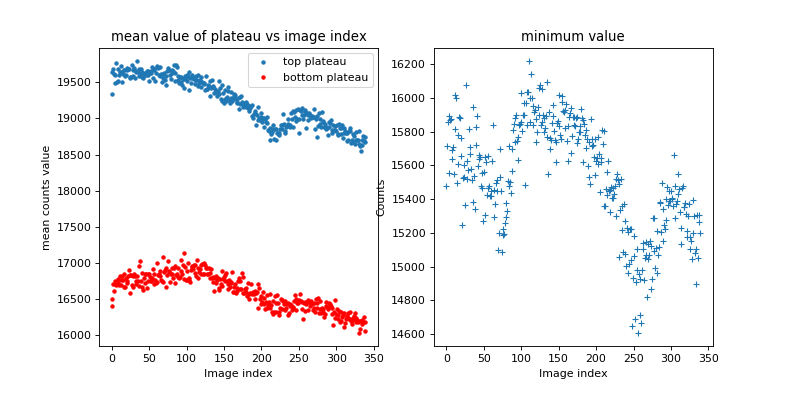

In [69]:
top_plateau_mean = []
bottom_plateau_mean = []
min_value = []
pixel_index_of_min_value = []

for _data in image_data:

    _profile = _data[:,profile_width_index]
    top_plateau_mean.append(np.mean(_profile[top_plateau_range[0]: top_plateau_range[1]]))
    bottom_plateau_mean.append(np.mean(_profile[bottom_plateau_range[0]: bottom_plateau_range[1]]))
    min_value.append(np.min(_profile))
    pixel_index_of_min_value.append(np.argmin(_profile))    

fig4 = plt.figure(figsize=(10, 5))

ax_img1 = plt.subplot(121)
ax_img1.plot(top_plateau_mean, '.', label="top plateau")
ax_img1.plot(bottom_plateau_mean, 'r.', label='bottom plateau')
ax_img1.legend()
ax_img1.set_title("mean value of plateau vs image index")
ax_img1.set_xlabel("Image index")
ax_img1.set_ylabel("mean counts value")

ax_img2 = plt.subplot(122)
ax_img2.plot(min_value, "+")
ax_img2.set_title("minimum value")
ax_img2.set_xlabel("Image index")
ax_img2.set_ylabel("Counts")

plt.show()

<IPython.core.display.Javascript object>


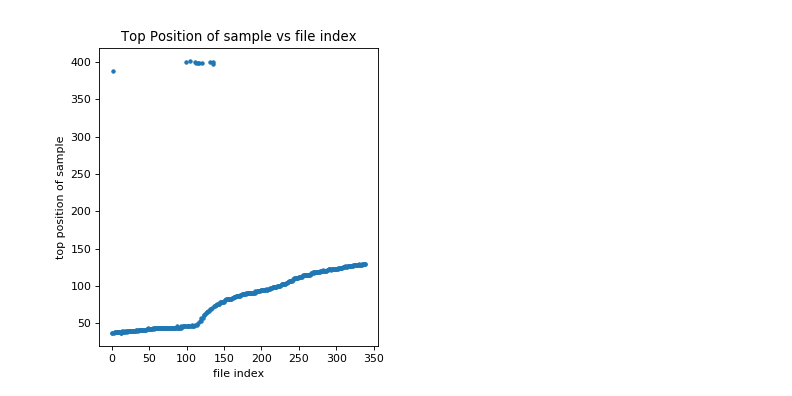

In [102]:
top_side_of_sample_pixel_value = []

for _index, _data in enumerate(image_data):

    profile = _data[:,profile_width]
    left_profile = profile[first_plateau_range[0]: pixel_index_of_min_value[_index]]
    left_profile = left_profile[::-1] #we will search starting at the min value
    
    mean_value = np.mean([first_plateau_mean[_index], min_value[_index]])

    found_min = False
    for _x_index, _x in enumerate(left_profile):
        
#         print(f"_x:{_x} and mean_value:{mean_value}")
        
        if _x > mean_value:
            real_index = len(left_profile) - 1 - _x_index
            top_side_of_sample_pixel_value.append(real_index)
            found_min = True
            break
    
    if found_min == False:
        top_side_of_sample_pixel_value.append(np.nan)
    
fig5 = plt.figure(figsize=(10, 5))

ax_img1 = plt.subplot(121)
ax_img1.plot(top_side_of_sample_pixel_value, '.')
ax_img1.set_xlabel("file index")
ax_img1.set_ylabel("top position of sample")
ax_img1.set_title("Top Position of sample vs file index")
plt.show()

<IPython.core.display.Javascript object>


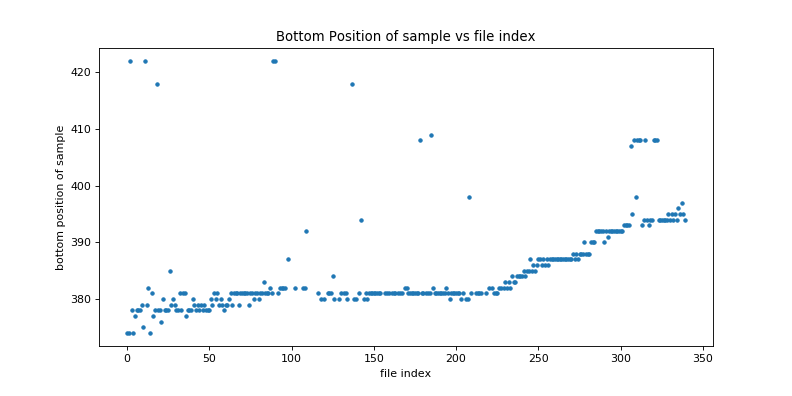

In [103]:
bottom_side_of_sample_pixel_value = []

for _index, _data in enumerate(image_data):

    profile = _data[:,profile_width]
    right_profile = profile[pixel_index_of_min_value[_index]: bottom_plateau_range[1]]
    
    mean_value = np.mean([bottom_plateau_mean[_index], min_value[_index]])

    found_min = False
    for _x_index, _x in enumerate(right_profile):
                
        if _x > mean_value:
            bottom_side_of_sample_pixel_value.append(_x_index + pixel_index_of_min_value[_index])
            found_min = True
            break
    
    if found_min == False:
        bottom_side_of_sample_pixel_value.append(np.nan)
    

fig5 = plt.figure(figsize=(10, 5))

ax_img1 = plt.subplot(111)
ax_img1.plot(bottom_side_of_sample_pixel_value, '.')
ax_img1.set_xlabel("file index")
ax_img1.set_ylabel("bottom position of sample")
ax_img1.set_title("Bottom Position of sample vs file index")
plt.show()

## Calculate sample size

In [108]:
height_sample = np.array(bottom_side_of_sample_pixel_value) - np.array(top_side_of_sample_pixel_value)


<IPython.core.display.Javascript object>


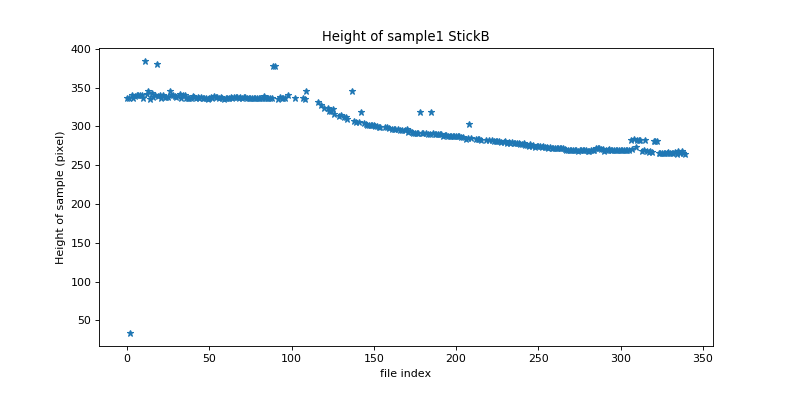

In [109]:
fig6 = plt.figure(figsize=(10, 5))

ax_img1 = plt.subplot(111)
ax_img1.plot(height_sample, '*')
ax_img1.set_xlabel("file index")
ax_img1.set_ylabel("Height of sample (pixel)")
ax_img1.set_title("Height of sample1 StickB")
plt.show()

In [114]:
output_file_name = '/Users/j35/Desktop/stickB_sample1_height.txt'
x_axis = np.arange(len(height_sample))
y_axis = height_sample

data = []
for _x, _y in zip(x_axis, y_axis):
    data.append(f"{_x}, {_y}")
    
metadata = ["#Stick B, sample 1", "#", "#File index, heigth of sample"]

def make_ascii_file(metadata=[], data=[], output_file_name='', dim='2d', sep=','):
    f = open(output_file_name, 'w')
    for _meta in metadata:
        _line = _meta + "\n"
        f.write(_line)
        
    for _data in data:
        if dim == '2d':
            _str_data = [str(_value) for _value in _data]
            _line = sep.join(_str_data) + "\n"
        else:
            _line = str(_data) + '\n'
        f.write(_line)
       
    f.close()

make_ascii_file(metadata=metadata,
               data=data,
               output_file_name=output_file_name,
               dim='1d')